In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls -lh *csv

-rw-rw-r-- 1 oem oem  835 Jun 23 00:30 coords_to_use.csv
-rw-rw-r-- 1 oem oem 4.4K Mar 23 00:37 fc_sgp_compare.csv
-rw-rw-r-- 1 oem oem 6.1K Jun 28 11:55 fc_sgp_params_and_metrics.csv
-rw-rw-r-- 1 oem oem  37K Jun 25 19:23 radprof_params_and_metrics.csv
-rw-rw-r-- 1 oem oem 6.4K Jun 28 11:55 rl_params_and_metrics.csv
-rw-rw-r-- 1 oem oem 7.4K Jun 28 11:54 sgp_params_and_metrics.csv
-rw-rw-r-- 1 oem oem 249K Jun  3 17:25 standard_stars.csv


In [3]:
df = pd.read_csv('radprof_params_and_metrics.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.columns = ["image", "original_radprof", "orig_fitted_data", "radprof", "fitted_data", "jsd_before", "jsd_after", "param_errs"]
df

,image,original_radprof,orig_fitted_data,radprof,fitted_data,jsd_before,jsd_after,param_errs
0,SGP_original_images/ccfbue110099.fits_327.3375...,"[8488.42530769351, 22343.91190656711, 28657.01...","[13062.264103384281, 20174.81393051751, 25874....","[27418.21165063486, 60074.138000843675, 52664....","[28164.61658424973, 58928.690496734926, 54075....",0.014004,0.000722,[5.97814599e+02 1.21650791e-02 1.30683723e-02]
1,SGP_original_images/ccfbvc170118.fits_178.244_...,"[662.0304222275687, 1905.2737187682055, 2708.1...","[1148.8946625722876, 1755.2232325647947, 2382....","[2426.4342265085043, 5550.480830777097, 6116.8...","[2881.7871160187888, 5046.183632925078, 6158.2...",0.002664,0.001473,[1.40682996e+02 4.54454104e-02 5.01558795e-02]
2,SGP_original_images/ccfbvc170118.fits_474.0155...,"[464.1421773092862, 1366.0382049323657, 2142.1...","[798.8159782865167, 1321.9750101122097, 1910.1...","[1883.456670563364, 4026.917381839926, 4469.53...","[2255.2203750504214, 3623.792326779507, 4402.9...",0.002352,0.001140,[1.12250802e+02 5.88833247e-02 6.57547272e-02]
3,SGP_original_images/ccfbvc170118.fits_485.6476...,"[4068.5312695887787, 11219.450645625968, 16301...","[7121.6436616620895, 10634.089624303082, 14210...","[18936.28131876793, 43811.37621280072, 44516.8...","[22352.828235828852, 39624.03495534107, 45699....",0.004072,0.001770,[1.21230389e+03 4.80688723e-02 5.31282273e-02]
4,SGP_original_images/ccfbvc170119.fits_226.8246...,"[310.0434397491654, 914.312283244539, 1331.072...","[533.7705345497296, 865.6147810129831, 1220.36...","[865.5766356781055, 2333.555887264639, 2778.86...","[1178.8860141479395, 2063.0123968508838, 2676....",0.004022,0.002473,[8.57121781e+01 6.82441242e-02 7.48846011e-02]
5,SGP_original_images/ccfbvc170119.fits_297.1877...,"[733.508582009514, 2017.7063993938173, 2814.98...","[1299.372881824437, 1911.1865685617206, 2530.3...","[2522.9011594633985, 5452.633746997327, 6146.2...","[2957.299384061543, 4958.504720708501, 6157.20...",0.004055,0.000862,[1.27249062e+02 4.52053568e-02 5.01254543e-02]
6,SGP_original_images/ccfbvc170119.fits_515.4571...,"[1738.088612248806, 5010.899983347319, 7459.21...","[3383.8404917754197, 4940.795360707747, 6592.1...","[5968.904186841785, 15256.307490653384, 18450....","[7591.982490504901, 13781.03614783316, 18162.6...",0.003284,0.001382,[4.36353942e+02 4.91066990e-02 5.35174695e-02]
7,SGP_original_images/ccfbvc170120.fits_266.2868...,"[5982.135779135774, 17545.89528593845, 27851.9...","[10511.109027981958, 17479.75197882159, 25616....","[19182.380964229087, 48354.68265824967, 60303....","[23527.64430677394, 44214.05896396027, 59867.4...",0.001809,0.001346,[1.19306283e+03 3.96616489e-02 4.28838673e-02]
8,SGP_original_images/ccfbvc170120.fits_484.9905...,"[491.19770365149617, 1540.9054251520658, 2531....","[863.3632429029976, 1535.276472539341, 2392.07...","[1775.0057803958578, 4575.778466508942, 6061.0...","[2575.77079583884, 4169.344303475132, 5581.216...",0.002038,0.002370,[1.83119161e+02 8.14694623e-02 8.96369538e-02]
9,SGP_original_images/ccfbvc170121.fits_178.0998...,"[1003.3213211341947, 2775.03532113009, 4190.57...","[1687.7917539058328, 2693.2908100904465, 3839....","[2727.2168147492293, 6522.549632911619, 8247.7...","[3442.767122191663, 5962.751454727247, 8011.75...",0.002002,0.001794,[1.72649613e+02 4.79877510e-02 5.24621151e-02]


In [11]:
df.iloc[5], df.iloc[9], df.iloc[4]

(image               SGP_original_images/ccfbvc170119.fits_297.1877...
 original_radprof    [733.508582009514, 2017.7063993938173, 2814.98...
 orig_fitted_data    [1299.372881824437, 1911.1865685617206, 2530.3...
 radprof             [2522.9011594633985, 5452.633746997327, 6146.2...
 fitted_data         [2957.299384061543, 4958.504720708501, 6157.20...
 jsd_before                                                   0.004055
 jsd_after                                                    0.000862
 param_errs             [1.27249062e+02 4.52053568e-02 5.01254543e-02]
 Name: 5, dtype: object,
 image               SGP_original_images/ccfbvc170121.fits_178.0998...
 original_radprof    [1003.3213211341947, 2775.03532113009, 4190.57...
 orig_fitted_data    [1687.7917539058328, 2693.2908100904465, 3839....
 radprof             [2727.2168147492293, 6522.549632911619, 8247.7...
 fitted_data         [3442.767122191663, 5962.751454727247, 8011.75...
 jsd_before                                         

In [12]:
df.iloc[5]['image'], df.iloc[9]['image'], df.iloc[4]['image']

('SGP_original_images/ccfbvc170119.fits_297.1877_311.5624_SGP_orig.fits',
 'SGP_original_images/ccfbvc170121.fits_178.0998_506.4224_SGP_orig.fits',
 'SGP_original_images/ccfbvc170119.fits_226.8246_174.0645_SGP_orig.fits')

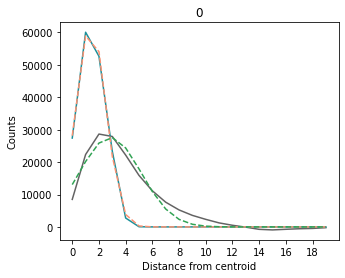

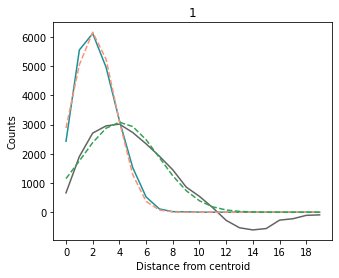

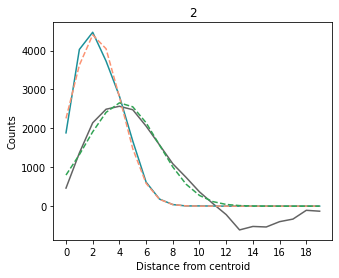

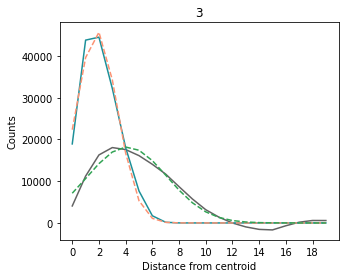

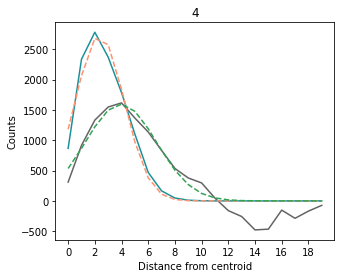

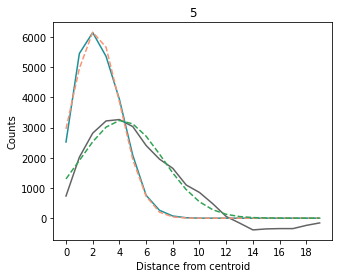

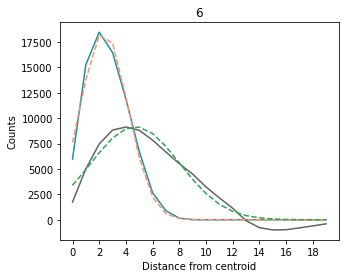

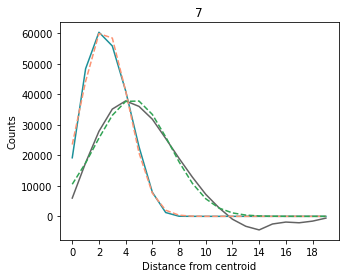

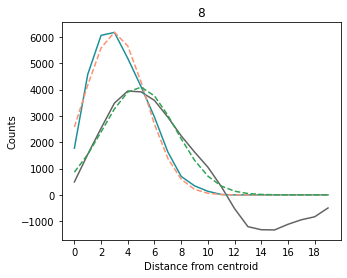

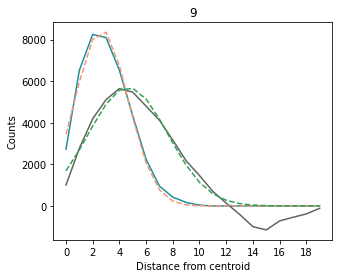

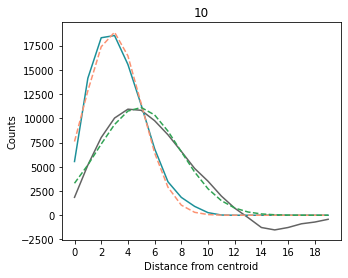

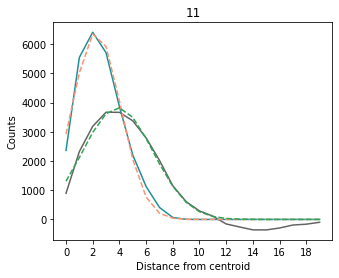

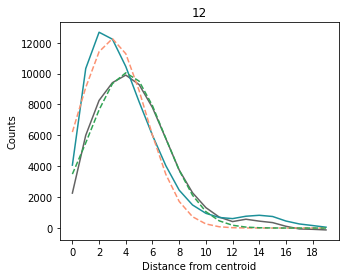

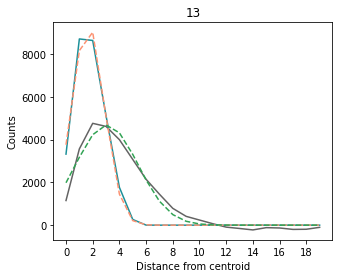

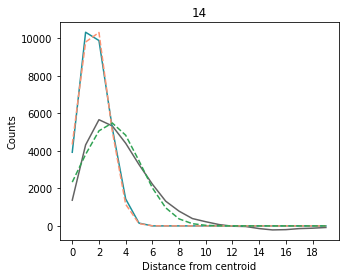

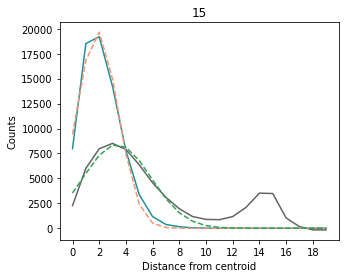

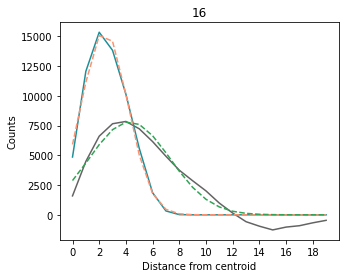

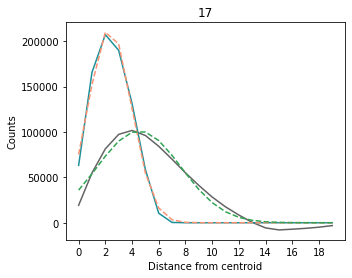

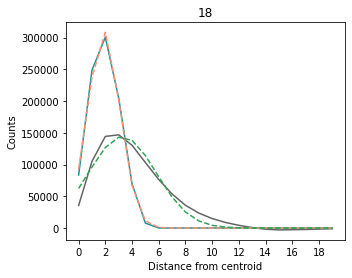

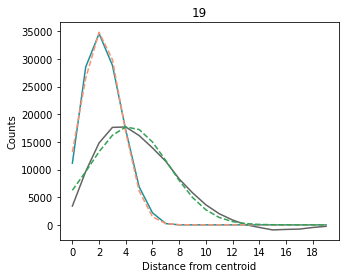

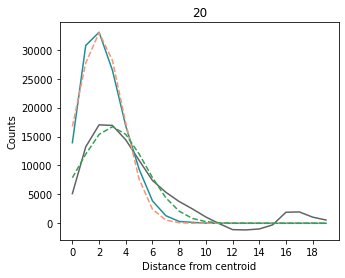

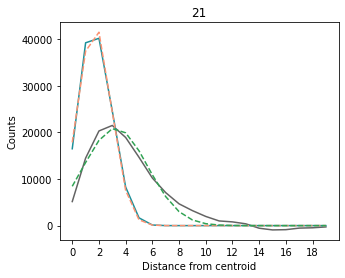

In [13]:
for i in range(df.shape[0]):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.plot(ast.literal_eval(df.iloc[i]["original_radprof"]), c='#636363', label='original');
    ax.plot(ast.literal_eval(df.iloc[i]["radprof"]), c='#1C9099', label='reconstructed');
    ax.plot(ast.literal_eval(df.iloc[i]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
    ax.plot(ast.literal_eval(df.iloc[i]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
    ax.set_xticks(ticks=np.arange(0, 20, 2));
    ax.set_ylabel("Counts");
    ax.set_xlabel("Distance from centroid");
    ax.set_title(f'{i}')
    plt.show()

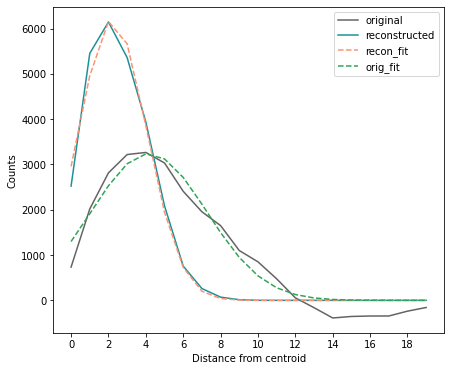

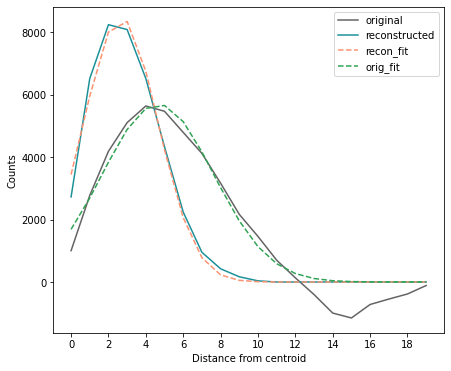

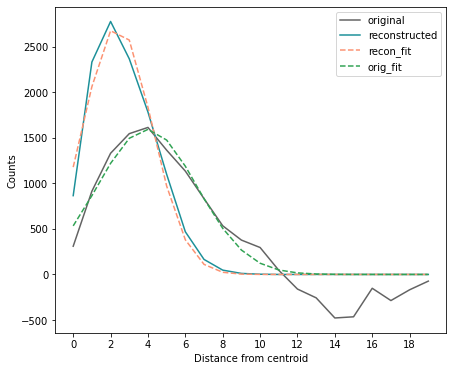

In [15]:
# df.iloc[0], df.iloc[1], df.iloc[27]

# colors = ["#7aa0c4", "#ca82e1", "#8bcd50"]

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.plot(ast.literal_eval(df.iloc[5]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[5]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[5]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[5]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 20, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");

plt.legend();
plt.savefig("radprof_5.png", bbox_inches='tight', dpi=500)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.plot(ast.literal_eval(df.iloc[9]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[9]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[9]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[9]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 20, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");
plt.legend();
plt.savefig("radprof_9.png", bbox_inches='tight', dpi=500)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.plot(ast.literal_eval(df.iloc[4]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[4]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[4]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[4]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 20, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");
plt.legend();
plt.savefig("radprof_4.png", bbox_inches='tight', dpi=500)

In [8]:
sum(df["jsd_before"] > df["jsd_after"])

18

In [9]:
df.iloc[1]["image"], df.iloc[3]["image"], df.iloc[27]["image"]

IndexError: single positional indexer is out-of-bounds

In [18]:
!ls -lh radprof*png

-rw-rw-r-- 1 oem oem 227K Jun 23 11:44 radprof_12.png
-rw-rw-r-- 1 oem oem 298K Jun 28 12:08 radprof_4.png
-rw-rw-r-- 1 oem oem 295K Jun 28 12:08 radprof_5.png
-rw-rw-r-- 1 oem oem 310K Jun 28 12:08 radprof_9.png
